In [ ]:
print("Hello Quantum World of IBM")

# QISKIT

Qiskit (Quantum Information Science Kit) is a collection of software for working with short-depth quantum circuits, and running near-term applications and experiments on quantum computers. In Qiskit, a quantum program is an array of quantum circuits. The program workflow consists of three stages: Build, Compile, and Run. Build allows you to generate different quantum circuits that represent the algorithm you are solving. Compile allows you to rewrite them to run on different backends (simulators/real chips of different quantum volumes, sizes, fidelity, etc). Run launches the jobs. After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted or allows you to make a better program for the next instance.

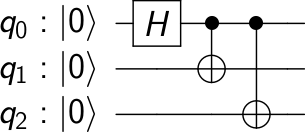

In [4]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.tools.visualization import circuit_drawer

# Create a Quantum Register with 3 qubits. Naming the QuantumRegister is optional
q = QuantumRegister(3, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

# Making a GHZ state

# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state.
circ.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting the qubits in a GHZ state.
circ.cx(q[0], q[2])

circuit_drawer(circ)

Qiskit Aer is the package for simulating quantum circuits. It provides many different backends for doing a simulation. The most common backend in Qiskit Aer is the statevector_simulator. This simulator returns the quantum state which is a complex vector of dimensions $2^n$ where $n$ is the number of qubits.

Qiskit convention for state vector: qubit 0 is in the least significant position in the binary representation of the state string.

simulation:  COMPLETED
[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


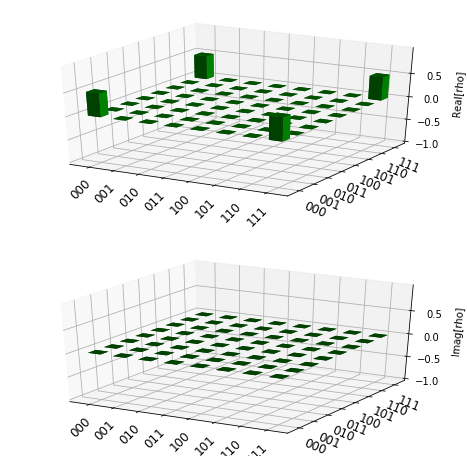

In [6]:
from qiskit import Aer
from qiskit import execute
import numpy as np
from qiskit.tools.visualization import plot_state

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = execute(circ, backend)

result = job.result()

outputstate  = result.get_statevector(circ)
print("simulation: ", result)
print(np.around(outputstate,3))
plot_state(outputstate)

Qiskit Aer also includes a unitary_simulator that works provided all the elements in the circuit are unitary operations. This backend calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit.

In [7]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print("simulation: ", result)
print(np.around(result.get_unitary(circ), 3))

simulation:  COMPLETED
[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


A real experiment terminates by measuring each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits xyz with probability $\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$. To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend. To simulate this circuit, we use the qasm_simulator in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the execute function, via the shots keyword.

{'000': 5077, '111': 5163}


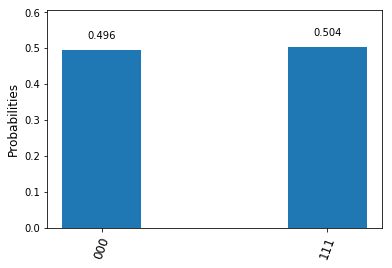

In [12]:
from qiskit import ClassicalRegister
from qiskit.tools.visualization import plot_histogram

# Create a Classical Register with 3 bits.
c = ClassicalRegister(3, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)
meas.barrier(q)
# map the quantum measurement to the classical bits
meas.measure(q,c)

# The Qiskit circuit object supports composition using the addition operator.
qc = circ+meas

#drawing the circuit
circuit_drawer(qc)

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

# Access the aggregated binary outcomes of the circuit
counts = result_sim.get_counts(qc)
print(counts)

plot_histogram(counts)